In [107]:
# use downloaded photos to extract RGB values (talk to Gabe about this)
# figure out how to plot/display image in python
# put all RGB values into a 2D array 
# loop through array?
# use array to create map of greenness, snow, or whatever Paul wants
# use im.getdata?

In [108]:
%matplotlib inline
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [111]:
# shows photo
response = requests.get('https://phenocam.sr.unh.edu/data/latest/bozeman.jpg')
img = Image.open(BytesIO(response.content))


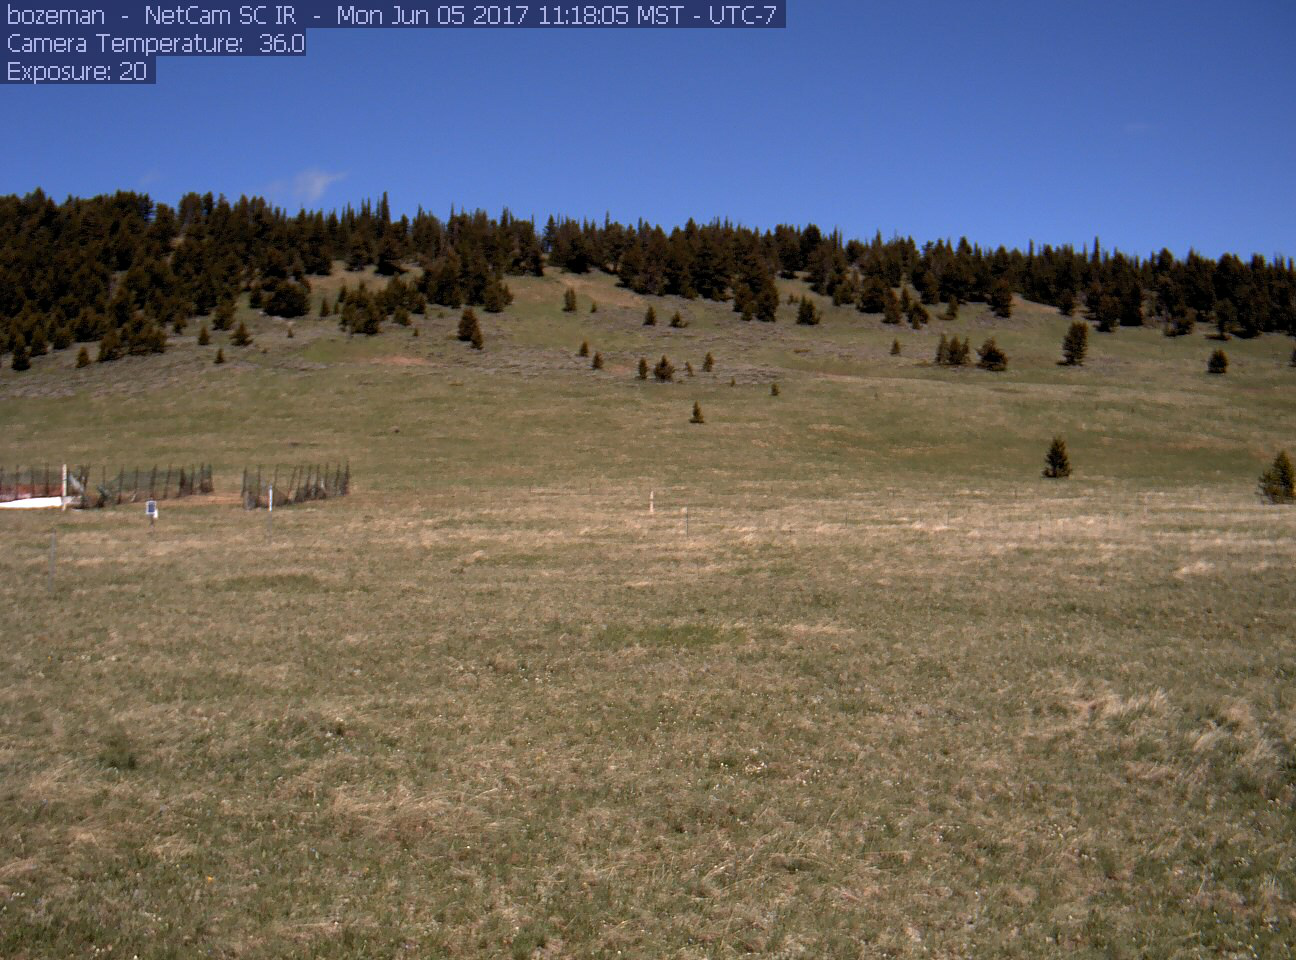

In [112]:
img

In [ ]:
# takes RGB values from each photo (this should be a loop)
# figure out how to put all values in an array